https://www.cnblogs.com/ronny/p/4001910.html

https://blog.csdn.net/qq_26276097/article/details/75038059


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import pylab

%matplotlib inline

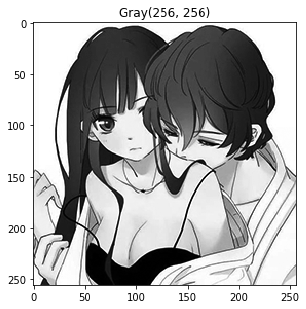

In [61]:
pylab.rcParams['figure.figsize'] = (16.0, 16.0) # 显示大小

gray = np.array(plt.imread("images/lovers_gray.bmp")) * 1.0 # necessary: int convert to float
plt.subplot(2, 3, 2)
plt.title("Gray" + str(gray.shape))
plt.imshow(gray, cmap=plt.cm.gray)

plt.show()

In [67]:
def Convolution(pixels, kernelX, kernelY):
    pixelW = pixels.shape[1]
    pixelH = pixels.shape[0]
    kernelW = kernelX.shape[1]
    kernelH = kernelX.shape[0]
    OX = int(kernelW / 2)
    OY = int(kernelH / 2)
    rets = np.zeros(pixels.shape)
    for u in range(pixelW):
        for v in range(pixelH):
            Gx = 0
            Gy = 0
            for i in range(kernelW):
                for j in range(kernelH):
                    ui = u + i - OX
                    vj = v + j - OY
                    if (ui >= 0 and vj >= 0 and ui < pixelW and vj < pixelH):
                        pixel = pixels[ui][vj]
                        Gx += pixel * kernelX[i][j]
                        Gy += pixel * kernelY[i][j]
            #rets[u][v] = abs(Gx) + abs(Gy)
            rets[u][v] = np.sqrt(Gx * Gx + Gy * Gy)
    # normalize
    rets = rets*(255.0/rets.max())
    return rets

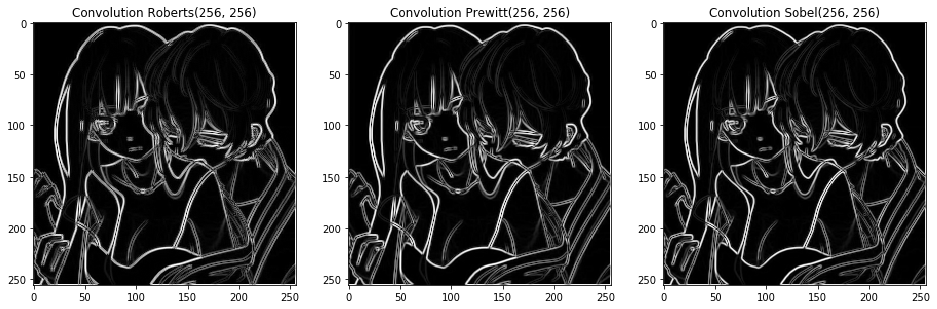

In [68]:
pylab.rcParams['figure.figsize'] = (16.0, 16.0) # 显示大小

kernelRobertsX = np.array([
    [-1, 0, 0],
    [0, 0, 0],
    [0, 0, 1]
])
kernelRobertsY = np.array([
    [0, 0, -1],
    [0, 0, 0],
    [1, 0, 0]
])

kernelPrewittX = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1], 
])
kernelPrewittY = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1], 
])

kernelSobelX = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1], 
])
kernelSobelY = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1], 
])

conv_Roberts = Convolution(gray, kernelRobertsX, kernelRobertsY)
plt.subplot(2, 3, 1)
plt.title("Convolution Roberts" + str(conv_Roberts.shape))
plt.imshow(conv_Roberts, cmap=plt.cm.gray)

conv_Prewitt = Convolution(gray, kernelPrewittX, kernelPrewittY)
plt.subplot(2, 3, 2)
plt.title("Convolution Prewitt" + str(conv_Prewitt.shape))
plt.imshow(conv_Prewitt, cmap=plt.cm.gray)

conv_Sobelt = Convolution(gray, kernelSobelX, kernelSobelY)
plt.subplot(2, 3, 3)
plt.title("Convolution Sobel" + str(conv_Sobelt.shape))
plt.imshow(conv_Sobelt, cmap=plt.cm.gray)

plt.show()